In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
df = pd.read_csv('main_vars.csv',index_col=0)

In [67]:
df.columns

Index(['#', 'country', 'gender', 'age', 'household_income', 'education_level',
       'years_from_grad', 'previous_lang_perf', 'previous_math_perf',
       'time_in_mins', 'percent_viewed', 'views_number', 'learn_scores',
       'cog_scores'],
      dtype='object')

In [68]:
df.shape

(411, 14)

### Variables analysis

#### Countries

In [69]:
df.country.value_counts()

Kenya           274
Nigeria          48
Uganda           19
Sudan            15
Ghana             9
Malawi            8
South Africa      5
Botswana          4
Zimbabwe          4
Ethiopia          3
South Sudan       2
Rwanda            2
Morocco           2
Tanzania          2
Egypt             2
Cameroon          2
Burundi           2
Tunisia           1
Somalia           1
Guinea            1
Liberia           1
Mozambique        1
Sierra Leone      1
Togo              1
Zambia            1
Name: country, dtype: int64

In [70]:
len(df.country.unique())

25

#### Gender

In [71]:
df.gender.value_counts()

Male      206
Female    205
Name: gender, dtype: int64

In [72]:
df.gender.value_counts(normalize=True)

Male      0.501217
Female    0.498783
Name: gender, dtype: float64

#### Highest education level

In [73]:
df.education_level.value_counts()

2    319
3     63
1     29
Name: education_level, dtype: int64

In [74]:
df.education_level.value_counts(normalize=True)

2    0.776156
3    0.153285
1    0.070560
Name: education_level, dtype: float64

#### Household income

In [75]:
# encoded = dict(sorted(dict(df.household_income.value_counts()).items()))
# responses = [
#     "Less than $1,000",
#     "$1,000-$2,999",
#     "$3,000-$4,999",
#     "$5,000-$9,999",
#     "$10,000-$14,999",
#     "$15,000 - $19,999",
#     "$20,000 - $29,999",
#     "$30,000 - $39,999",
#     "$40,000 - $49,999",
#     "$50,000 - $59,999",
#     "Above $60,000",
# ]
# for i in range(len(responses)):
#     print(f"{responses[list(encoded.keys())[i]-1]} : {list(encoded.values())[i]}")

In [76]:
df.household_income.value_counts()

1    189
2     86
5     56
3     45
4     35
Name: household_income, dtype: int64

In [77]:
df.household_income.value_counts(normalize=True)

1    0.459854
2    0.209246
5    0.136253
3    0.109489
4    0.085158
Name: household_income, dtype: float64

In [78]:
# encoded = dict(sorted(dict(df.household_income.value_counts(normalize=True)).items()))
# for i in range(len(responses)):
#     print(f"{responses[list(encoded.keys())[i]-1]} : {list(encoded.values())[i]:.4f}")

In [79]:
13/411

0.031630170316301706

#### Age

In [80]:
df.age.describe()

count    411.000000
mean      27.335766
std        4.535944
min       19.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       53.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

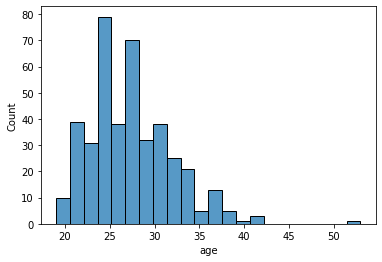

In [81]:
sns.histplot(df.age)

#### Languages performance

In [82]:
encoded = dict(sorted(dict(df.previous_lang_perf.value_counts()).items()))
responses = [
    "I perform well below average in langauges",
    "I perform slightly below average in languages",
    "I perform averagely in languages",
    "I perform slightly above average in languages",
    "I perform well above average in languages",
]
df.previous_lang_perf.value_counts()
# for i in range(len(responses)):
#     print(f"{responses[list(encoded.keys())[i]-1]} : {list(encoded.values())[i]}")

5    254
4    103
3     43
1      8
2      3
Name: previous_lang_perf, dtype: int64

#### Math performance

In [83]:
encoded = dict(sorted(dict(df.previous_math_perf.value_counts()).items()))
responses = [
    "I perform well below average in Math",
    "I perform slightly below averagely in Math",
    "I perform averagely in Math",
    "I perform slightly above average in Math",
    "I perform well above average in Math",
]
df.previous_math_perf.value_counts()
# for i in range(len(responses)):
#     print(f"{responses[list(encoded.keys())[i]-1]} : {list(encoded.values())[i]}")

5    237
4     99
3     55
2     12
1      8
Name: previous_math_perf, dtype: int64

#### IRT scores analysis

In [84]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [85]:
x = df.cog_scores
y = df.learn_scores
csfont = {"fontname": "Times New Roman"}
hfont = {"fontname": "Helvetica"}
re = stats.linregress(x, y)

In [86]:
len(df.cog_scores)

411

In [87]:
df.cog_scores.min()

-2.20387001147126

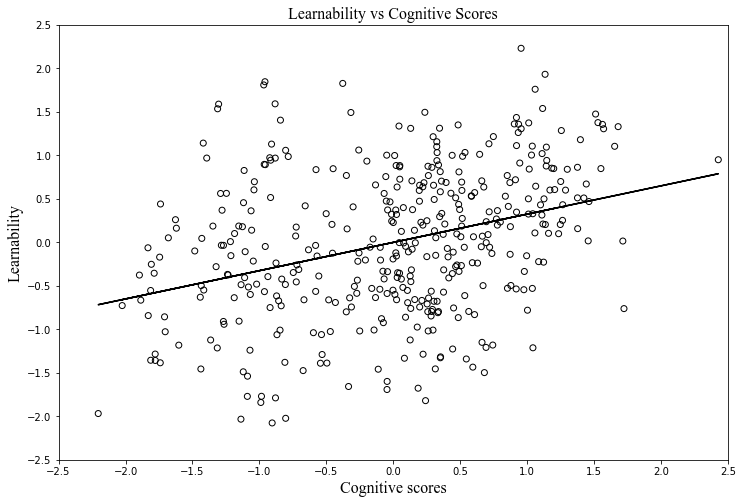

In [88]:
plt.figure(figsize=(12, 8))
lim = 0.05
ticks = np.arange(-2.5, 2.6, step=0.5)
plt.scatter(x, y, facecolors="none", edgecolors="black")
plt.plot(x, re.intercept + re.slope * x, label="best fit", c="black")
plt.ylim(df.learn_scores.min() - lim, df.learn_scores.max() + lim)
plt.xlim(df.cog_scores.min() - lim, df.cog_scores.max() + lim)
plt.xticks(ticks=ticks)
plt.yticks(ticks=ticks)
plt.xlabel(r"Cognitive scores", fontsize=16, **csfont)
plt.ylabel(r"Learnability", fontsize=16, **csfont)
plt.title(r"Learnability vs Cognitive Scores", fontsize=16, **csfont)
plt.show()

In [89]:
print(re.rvalue)

0.33898081061417656


In [90]:
print(f"R-squared: {re.rvalue**2:.6f}")

R-squared: 0.114908


In [91]:
re.pvalue

1.6480826124191712e-12

In [92]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = (
        t
        * s_err
        * np.sqrt(1 / n + (x2 - np.mean(x)) ** 2 / np.sum((x - np.mean(x)) ** 2))
    )
    ax.fill_between(x2, y2 + ci, y2 - ci, color="black", alpha=.2)

    return ax

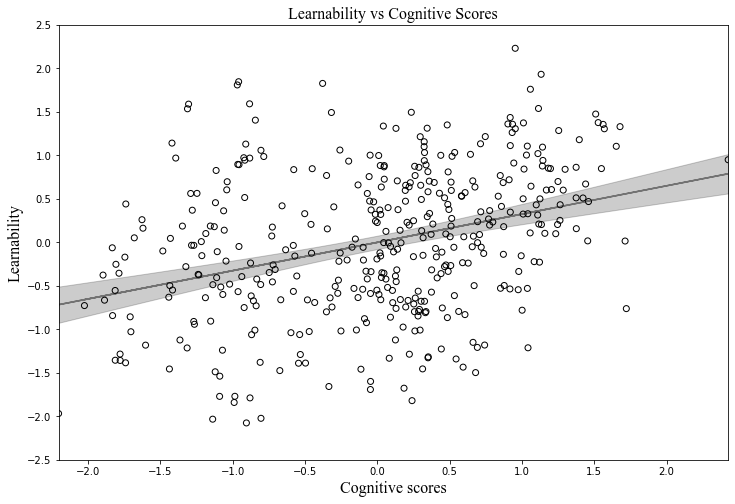

In [93]:
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b)


x = df.cog_scores
y = df.learn_scores
p, cov = np.polyfit(
    x, y, 1, cov=True
)  # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(
    p, x
)  # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = df.learn_scores.size  # number of observations
m = p.size  # number of parameters
dof = n - m  # degrees of freedom
t = stats.t.ppf(0.975, n - m)  # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model  # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model) ** 2)  # chi-squared; estimates error in data
chi2_red = chi2 / dof  # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)  # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Data
ax.scatter(
    x,
    y,
    edgecolors="black",
    facecolors="None",
)

# Fit
ax.plot(x, y_model, "-", color="0.1", alpha=0.5, label="Fit")

ax.axis(
    xmin=df.cog_scores.min(),
    xmax=df.cog_scores.max(),
    ymin=df.learn_scores.min(),
    ymax=df.learn_scores.max(),
)


xticks = np.arange(-2.0, 2.5, step=0.5)
yticks = np.arange(-2.5, 2.6, step=0.5)

ax.set_xticks(ticks=xticks)
ax.set_yticks(ticks=yticks)
ax.set_xlabel(r"Cognitive scores", fontsize=16, **csfont)
ax.set_ylabel(r"Learnability", fontsize=16, **csfont)
plt.title(r"Learnability vs Cognitive Scores", fontsize=16, **csfont)


x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
# plot_ci_bootstrap(x, y, resid, ax=ax)

# Prediction Interval
pi = (
    t
    * s_err
    * np.sqrt(1 + 1 / n + (x2 - np.mean(x)) ** 2 / np.sum((x - np.mean(x)) ** 2))
)
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
# ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
# ax.plot(x2, y2 + pi, "--", color="0.5")